In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chisquare
from scipy.stats import chi2_contingency 
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [11]:
cleanedset = pd.read_csv('Q1NumericalValues2.csv')
cleanedset.head(5)

,Patient.ID,FRDPersonnelID,Shift,UnitId,FireStation,Fire.Station.Name,Station.Address,Station.City,Stattion.State,Station.Zip.Code,...,Dim_Medication_PK,Medication.Prescribed,Medication_Given_RXCUI_Code,Medication_Given_Description,FRDPersonnelID...Medication,Medication_Administered_Date_Time,Maleinteraction,Femaleinteraction,Mixedinteraction,Interaction
0,506561,C60CADD0-7A1F-42D7-B90E-687F0364A81E,A - Shift,M438,38,West Centreville,6001 ODay Drive,Centreville,Virginia,20120-1612,...,NaN,No Medication Prescribed,NaN,10,NaN,NaN,10,20,10,FemaleToFemale
1,530126,D2106DC5-10B0-4901-A713-2E08DCEF544B,A - Shift,M438,38,West Centreville,6001 ODay Drive,Centreville,Virginia,20120-1612,...,NaN,No Medication Prescribed,NaN,10,NaN,NaN,10,20,10,FemaleToFemale
2,530212,D2106DC5-10B0-4901-A713-2E08DCEF544B,A - Shift,M438,38,West Centreville,6001 ODay Drive,Centreville,Virginia,20120-1612,...,NaN,No Medication Prescribed,NaN,10,NaN,NaN,10,20,10,FemaleToFemale
3,510809,B0D3C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M438,38,West Centreville,6001 ODay Drive,Centreville,Virginia,20120-1612,...,NaN,No Medication Prescribed,NaN,10,NaN,NaN,10,20,10,FemaleToFemale
4,1342992,BDD8C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M438,38,West Centreville,6001 ODay Drive,Centreville,Virginia,20120-1612,...,433776.0,Medication Presribed,125464.0,25,0A89F8EB-32DE-4505-9DCA-CF9C68E09DCE,9/9/2020 10:52,10,20,10,FemaleToFemale


<font size = 4>K-means Clustering can help us group our data to know if any group has decrete data which may end up being removed as outliers such as cluster 3 below based on the attributes related to Q1</font>

In [14]:
F = cleanedset[['Procedure_Performed_Description', 'Medication_Given_Description', 'Maleinteraction', 'Femaleinteraction', 'Mixedinteraction']]

In [19]:
kmeans = KMeans(n_clusters=3).fit(F)
centroids = kmeans.cluster_centers_
F['clusters'] = kmeans.fit_predict(F)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


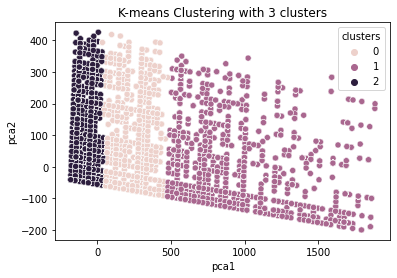

In [21]:
reduced_data = PCA(n_components=2).fit_transform(F)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=F['clusters'], data=results)
plt.title('K-means Clustering with 3 clusters')
plt.show()

In [22]:
s = F[F['clusters'] != 2]
s

,Procedure_Performed_Description,Medication_Given_Description,Maleinteraction,Femaleinteraction,Mixedinteraction,clusters
65,250,115,10,20,10,0
66,280,115,10,20,10,0
68,310,115,10,20,10,0
69,340,115,10,20,10,0
73,250,115,10,20,10,0
...,...,...,...,...,...,...
795138,790,10,20,10,10,1
795147,430,10,20,10,10,0
795155,1060,10,20,10,10,1
795156,700,10,20,10,10,1


In [23]:
s.to_csv('dd.csv', index = False)

<font size = 4>How to determine optimal K value:

In [17]:
mms = MinMaxScaler()
mms.fit(F)
data_transformed = mms.transform(F)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

<font size = 4>If the plot looks like an arm, then the elbow on the arm is optimal k, which is approximately 3.

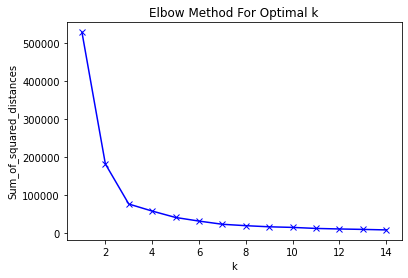

In [18]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()